# Facail Recogention With Deep Learning

## Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
# تحميل مجموعة البيانات
d = np.load('/content/ORL_faces.npz')

# تحميل "صور التدريب"
x_train = d['trainX']

# تقليل قيم الصور لنطاق بين 0 و1
x_train = np.array(x_train, dtype='float32') / 255

# تحميل صور الاختبار
x_test = d['testX']
x_test = np.array(x_test, dtype='float32') / 255

# تحميل تسميات الصور
y_train = d['trainY']
y_test = d['testY']



In [3]:
# عرض تنسيق بيانات التدريب والاختبار
print('تنسيق x_train: {}'.format(x_train[:]))
print('شكل Y-train: {}'.format(y_train))
print('شكل x_test: {}'.format(x_test.shape))


تنسيق x_train: [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
شكل Y-train: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 1

## View a few Images

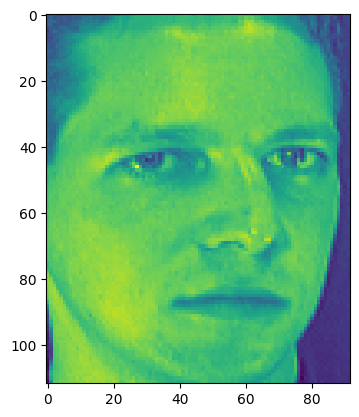

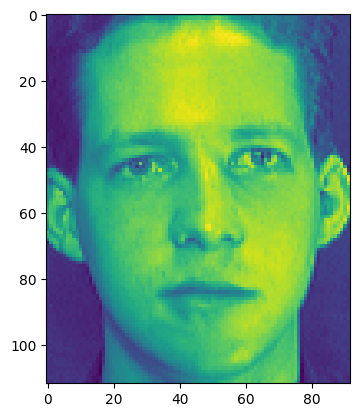

In [4]:
# عرض صورة من بيانات التدريب
c = x_train[1].reshape(112, 92)
plt.imshow(c)
plt.show()

# عرض صورة من بيانات الاختبار
d = x_test[1].reshape(112, 92)
plt.imshow(d)
plt.show()


## Split Dataset To Train and Test and Validataion datasrts

In [5]:
# قسمة بيانات التدريب إلى بيانات تدريب وتحقق
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.05, random_state=42)


## Performing Necessary Transformations To Prepare the data for input to the CNN model

In [6]:
# تحديد أبعاد الصور وحجم الدُفعة لعملية التدريب
im_rows = 112
im_cols = 92
batch_size = 512
im_shape = (im_rows, im_cols, 1)

# تغيير حجم الصور
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

# طباعة أشكال مصفوفات بيانات التدريب والاختبار
print('شكل x_train: {}'.format(x_train.shape))
print('شكل x_test: {}'.format(x_test.shape))


شكل x_train: (228, 112, 92, 1)
شكل x_test: (160, 112, 92, 1)


## Build a CNN model with three main layers: a convolutional layer, a pooling layer, and a fully connected layer.

In [7]:
# عدد الفلاتر يمثل عمق الصورة الناتجة أو حجم النواة
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    # 20 هو عدد الإخراجات المتوقعة
    Dense(20, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',  # نوع الدالة المستخدمة لحساب الخسارة
    optimizer=Adam(learning_rate=0.0001),  # نوع الأمثلة المستخدم لتحديث الوزن
    metrics=['accuracy']  # القياس المستخدم لتقييم أداء النموذج
)


In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 53, 43, 36)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 19, 54)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

## Train The Model

In [9]:
# تدريب النموذج باستخدام بيانات التدريب والتحقق لعدة حلقات
history = cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=100, verbose=2,
    validation_data=(np.array(x_valid), np.array(y_valid)),
)


Epoch 1/100
1/1 - 10s - loss: 3.0228 - accuracy: 0.0482 - val_loss: 2.9933 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 2/100
1/1 - 10s - loss: 3.0236 - accuracy: 0.0439 - val_loss: 3.0064 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 3/100
1/1 - 8s - loss: 3.0097 - accuracy: 0.0614 - val_loss: 3.0193 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 4/100
1/1 - 9s - loss: 2.9869 - accuracy: 0.0921 - val_loss: 3.0243 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 5/100
1/1 - 10s - loss: 3.0064 - accuracy: 0.0614 - val_loss: 3.0274 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 6/100
1/1 - 8s - loss: 3.0091 - accuracy: 0.0746 - val_loss: 3.0321 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 7/100
1/1 - 10s - loss: 3.0158 - accuracy: 0.0570 - val_loss: 3.0344 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 8/100
1/1 - 8s - loss: 2.9739 - accuracy: 0.0570 - val_loss: 3.0324 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 9/100


## Plot The Results

In [10]:
# تقييم أداء النموذج باستخدام بيانات الاختبار
score = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)

# طباعة قيمة الخسارة على بيانات الاختبار
print('خسارة الاختبار: {:.4f}'.format(score[0]))

# طباعة دقة النموذج على بيانات الاختبار
print('دقة الاختبار: {:.4f}'.format(score[1]))


خسارة الاختبار: 0.3711
دقة الاختبار: 0.9000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


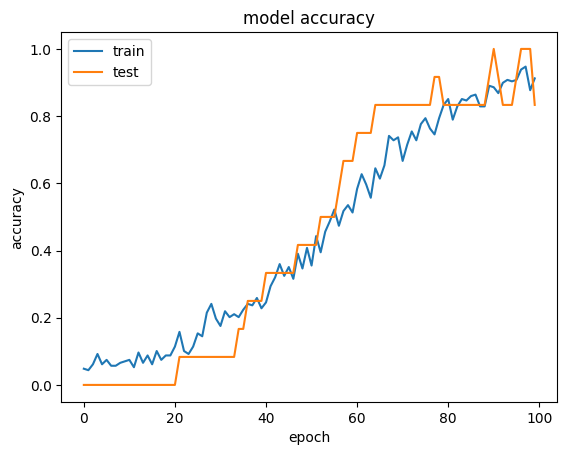

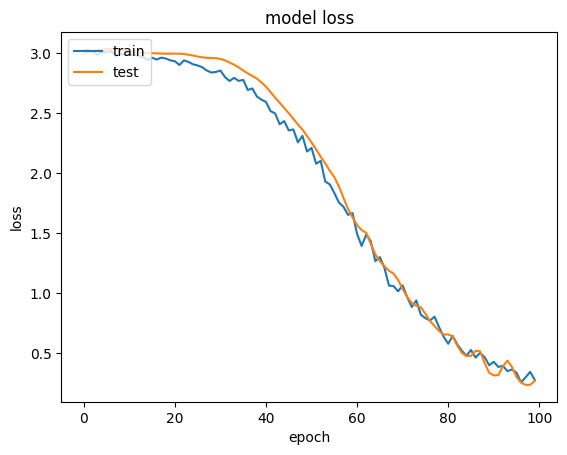

In [12]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [13]:
# استخراج دقة التدريب والتحقق النهائية من التاريخ
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100

# طباعة دقة التدريب النهائية
print("دقة التدريب النهائية: {:.2f}%".format(final_train_accuracy))

# طباعة دقة التحقق النهائية
print("دقة التحقق النهائية: {:.2f}%".format(final_val_accuracy))



دقة التدريب النهائية: 91.23%
دقة التحقق النهائية: 83.33%
